| 任務類型 | 優化手段 | 舉例 |
|:---:|:---:|:---:|
| IO Bound | Multithreading | 爬蟲程式、大量文件讀寫、串接第三方API |
| CPU Bound | Multiprocessing | 大量資料處理、數學運算 |

In [1]:
import threading
import time

# 定義一個函式用於打印數字
def print_numbers(start, end):
    for number in range(start, end + 1):
        print(number, end=', ')
        time.sleep(1)

# 創建執行緒
thread1 = threading.Thread(target=print_numbers, args=(1, 5))
thread2 = threading.Thread(target=print_numbers, args=(6, 10))
thread3 = threading.Thread(target=print_numbers, args=(11, 15))

# 啟動執行緒
thread1.start()
thread2.start()
thread3.start()

# 等待所有執行緒完成
thread1.join()
thread2.join()
thread3.join()

print("所有數字打印完成。")


1, 6, 11, 127, 2, , 313, 8, , 914, 4, , 155, 10, , 所有數字打印完成。


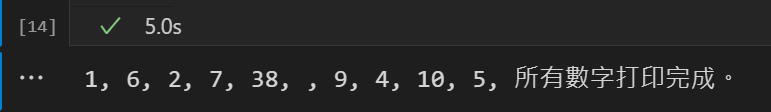

In [2]:
import threading
import time

# 創建一個執行緒鎖
lock = threading.Lock()

# 定義一個函式用於打印數字
def print_numbers(start, end):
    for number in range(start, end + 1):
        lock.acquire()
        print(number, end=', ')
        lock.release()
        time.sleep(0.5)

        
# 創建兩個執行緒
thread1 = threading.Thread(target=print_numbers, args=(1, 5))
thread2 = threading.Thread(target=print_numbers, args=(6, 10))

# 啟動執行緒
thread1.start()
thread2.start()

# 等待所有執行緒完成
thread1.join()
thread2.join()

print("所有數字打印完成。")


1, 6, 7, 2, 3, 8, 4, 9, 10, 5, 所有數字打印完成。


In [3]:

tasks = [(1, 5), (6, 10), (11, 15)]
thread_list = []

for task in tasks:
    thread = threading.Thread(target=print_numbers, args=task)
    thread.start()
    thread_list.append(thread)

for t in thread_list:
    t.join()

1, 6, 11, 12, 2, 7, 13, 8, 3, 14, 9, 4, 10, 5, 15, 